A Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status,
Education, Number of Dependents, Income, Loan Amount, Credit History and others. To
automate this process, they have given a problem to identify the customers segments, those
are eligible for loan amount so that they can specifically target these customers. Here they
have provided a data set.


#Variable Descriptions:
Variable          Description
Loan_ID           Unique Loan ID
Gender            Male/ Female
Married           Applicant married (Y/N)
Dependents        Number of dependents
Education         Applicant Education (Graduate/ Under Graduate)
Self_Employed     Self employed (Y/N)
ApplicantIncome   Applicant income
CoapplicantIncome Coapplicant income
LoanAmount        Loan amount in thousands
Loan_Amount_Term  Term of loan in months
Credit_History    credit history meets guidelines
Property_Area     Urban/ Semi Urban/ Rural
Loan_Status       Loan approved (Y/N)

Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

Reading the training and testing datasets into a dataframe using pandas

In [2]:
train = pd.read_csv('C:\\Users\\priya\\Desktop\\intro to datascience\\Datasets\\Loan prediction project\\train.csv')
test = pd.read_csv('C:\\Users\\priya\\Desktop\\intro to datascience\\Datasets\\Loan prediction project\\test.csv')              

In [205]:
train.head() #output first 5 rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_log,Type
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1,5849.0,4.857444,Train
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0,6091.0,4.852030,Train
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1,3000.0,4.189655,Train
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1,4941.0,4.787492,Train
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1,6000.0,4.948760,Train


In [206]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Type
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Test
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Test
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Test
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Test
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Test
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Test
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,Test
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,Test


In [11]:
train_length = len(train) #total number of observations in train dataset
train_length

614

In [10]:
test_col = len(test.columns) # total no.of columns in test dataset
test_col

12

In [12]:
train.describe() #statistics of numerical variables in train dataset

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [15]:
#getting the unique values and the frequency of categorical variable Property_area
train.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

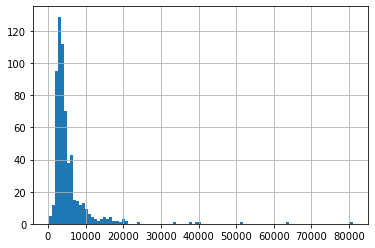

In [24]:
#Understanding the distributions of Numerical variables and observing the outliers
import matplotlib.pyplot as plt
%matplotlib inline

#Histogram of ApplicantIncome
train.ApplicantIncome.hist(bins = 100)

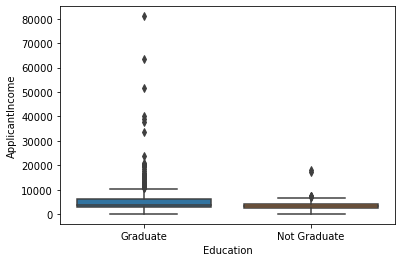

In [31]:
#Boxplot for variable applicantIncome by variable Education of train dataset
import seaborn as sns
sns.boxplot(y = 'ApplicantIncome', x = 'Education',data = train)

In [ ]:
# We see that there is no substantial difference between mean income of graduates and non-graduates\
#But graduates with high income appear to be outliers

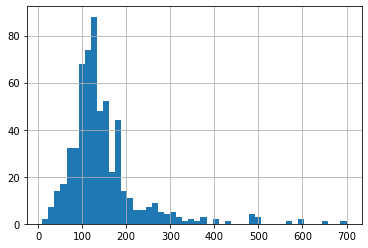

In [38]:
#Histogram of variable Loan amount
train.LoanAmount.hist(bins = 50)

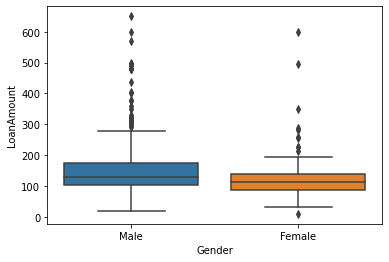

In [39]:
#Boxplot for LoanAmount by variable gender of train dataset
sns.boxplot( x = 'Gender', y = 'LoanAmount', data = train)

In [42]:
#LoanIncome has extreme values

In [43]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [136]:
train.Loan_Status

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

UNDERSTANDING DISTRIBUTION OF CAT VARIABLES

In [49]:
#Loan approval Rates
loan_approval = train.Loan_Status.value_counts().Y
loan_approval

422

In [52]:
#Credit_History and Loan_Status
pd.crosstab(train.Credit_History, train.Loan_Status, margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [60]:
#defining function percentageconvert rowwise in crosstable
def percentageconvert(ser):
    return (ser/ser[-1])*100

#Loan approval rates for customers with credit_rate 1
df = pd.crosstab(train.Credit_History, train.Loan_Status, margins = True).apply(percentageconvert, axis = 1)

In [61]:
df

Loan_Status,N,Y,All
Credit_History,,,
0.0,92.134831,7.865169,100.0
1.0,20.421053,79.578947,100.0
All,31.737589,68.262411,100.0


In [58]:
Loan_approval_for_credit_1 = df['Y'][1]

79.57894736842105

In [76]:
# 79.57% of the Loan was approval who has a Credit history of 1

In [77]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [94]:
# Replace the missing value of Self employed with most frequent category
train.Self_Employed.isnull().sum()
train.Self_Employed.fillna(value = 'No',inplace =True)
train.Self_Employed.isnull().sum()

0

OUTLIERS OF LOAN AMOUNT AND TOTAL INCOME

In [83]:
#creating a new column called total income
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [84]:
train    

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


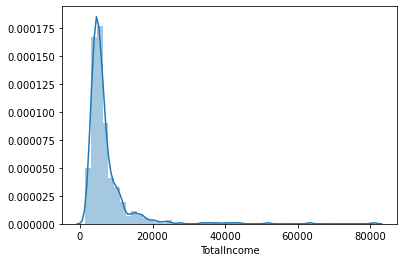

In [88]:
#looking at distributions of TotalIncome
sns.distplot(train['TotalIncome'],bins=50)

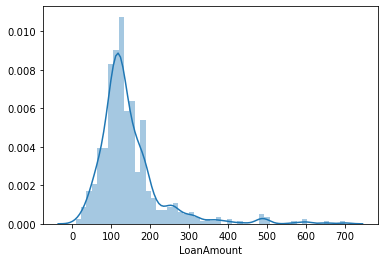

In [90]:
#looking at distribution plot of Loan amount
sns.distplot(train['LoanAmount'],bins=50)

In [91]:
# as we see, extreme values are practically possible with LoanAmount due to specific reasons
#instead of treating them as outliers, lets perform log transformation to nullify the effect.
train['LoanAmount_log'] = np.log(train['LoanAmount'])

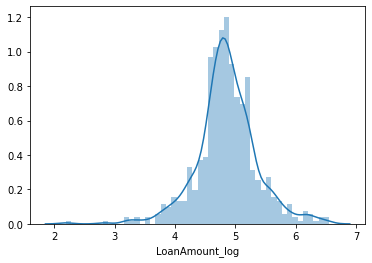

In [96]:
#now looking at loanamount_log
sns.distplot(train['LoanAmount_log'], bins =50)

In [112]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,4.948760


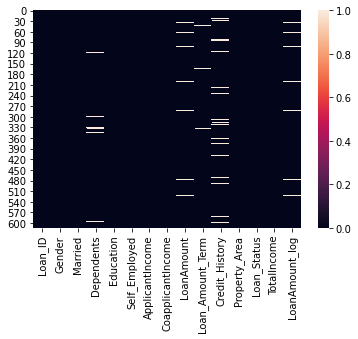

In [116]:
#Check for all the empty columns using the heatmap
sns.heatmap(train.isnull())

DATA PREPARATION FOR MODEL BUILDING

In [124]:
#Imputing all the missing values for Gender in the dataset
train.Gender.fillna(train.Gender.mode()[0],inplace = True)

#Imputing missing values for married
train.Married.fillna(train.Married.mode()[0],inplace = True)

#Imputing missing values for Dependents
train.Dependents.fillna(train.Dependents.mode()[0],inplace = True)

#Imputing missing values for Credit_History
train.Credit_History.fillna(train.Credit_History.mode()[0],inplace = True)



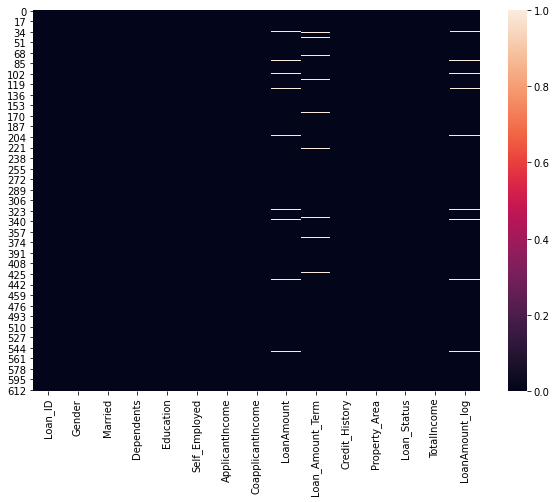

In [129]:
#Check for all the empty columns after the imputations 
plt.figure(figsize =(10,7))
sns.heatmap(train.isnull())

In [163]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome', 'LoanAmount_log'],
      dtype='object')

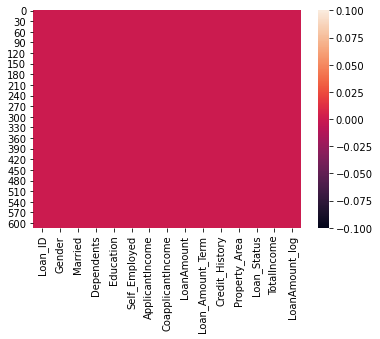

In [164]:
# Imputing missing values with mean for numeric variables:
train.LoanAmount.fillna(train.LoanAmount.mean(),inplace = True)

train.LoanAmount_log.fillna(train.LoanAmount_log.mean(),inplace = True)

train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mean(),inplace = True)

sns.heatmap(train.isnull())

In [165]:

train.ApplicantIncome.isnull().sum()

train.CoapplicantIncome.isnull().sum()

0

In [162]:
train.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int32
Property_Area          int32
Loan_Status            int32
TotalIncome          float64
LoanAmount_log       float64
dtype: object

MODEL BUILDING

In [159]:
#To perform sklearn we should convert all the categorical variable to numeric by encoding the categories
#This is done by using Labele Encoder

cat = [ 'Gender', 'Married', 'Dependents', 'Education','Self_Employed','Credit_History', 'Property_Area']

for var in cat:
    le = preprocessing.LabelEncoder()
    train[var] = le.fit_transform(train[var].astype('str'))
    train['Loan_Status'] = le.fit_transform(train['Loan_Status'].astype('str'))


In [161]:
train.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int32
Property_Area          int32
Loan_Status            int32
TotalIncome          float64
LoanAmount_log       float64
dtype: object

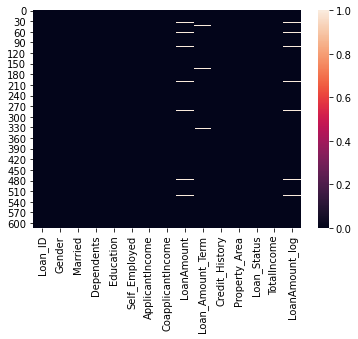

In [143]:
sns.heatmap(train.isnull())

MODEL BUILDING

In [203]:
#Create a flag for train and test datasets
train['Type'] = 'Train'
test['Type'] = 'Test'

#Combining both train and test datasets
fulldata = pd.concat([train,test], axis = 0, sort = True)

In [204]:
fulldata

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,LoanAmount_log,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,TotalIncome,Type
0,5849,0.0,1.0,0,0,1,146.412162,4.857444,360.0,LP001002,1.0,0,2,0,5849.0,Train
1,4583,1508.0,1.0,1,0,1,128.000000,4.852030,360.0,LP001003,0.0,1,0,0,6091.0,Train
2,3000,0.0,1.0,0,0,1,66.000000,4.189655,360.0,LP001005,1.0,1,2,1,3000.0,Train
3,2583,2358.0,1.0,0,1,1,120.000000,4.787492,360.0,LP001006,1.0,1,2,0,4941.0,Train
4,6000,0.0,1.0,0,0,1,141.000000,4.948760,360.0,LP001008,1.0,0,2,0,6000.0,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777.0,1.0,3+,Not Graduate,Male,113.000000,NaN,360.0,LP002971,NaN,Yes,Urban,Yes,NaN,Test
363,4158,709.0,1.0,0,Graduate,Male,115.000000,NaN,360.0,LP002975,NaN,Yes,Urban,No,NaN,Test
364,3250,1993.0,NaN,0,Graduate,Male,126.000000,NaN,360.0,LP002980,NaN,No,Semiurban,No,NaN,Test
365,5000,2393.0,1.0,0,Graduate,Male,158.000000,NaN,360.0,LP002986,NaN,Yes,Rural,No,NaN,Test


In [207]:
fulldata.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        29
Dependents            10
Education              0
Gender                11
LoanAmount             5
LoanAmount_log       367
Loan_Amount_Term       6
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed         23
TotalIncome          367
Type                   0
dtype: int64

In [209]:
fulldata.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
Credit_History       float64
Dependents            object
Education             object
Gender                object
LoanAmount           float64
LoanAmount_log       float64
Loan_Amount_Term     float64
Loan_ID               object
Loan_Status          float64
Married               object
Property_Area         object
Self_Employed         object
TotalIncome          float64
Type                  object
dtype: object

In [210]:
fulldata.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'Dependents',
       'Education', 'Gender', 'LoanAmount', 'LoanAmount_log',
       'Loan_Amount_Term', 'Loan_ID', 'Loan_Status', 'Married',
       'Property_Area', 'Self_Employed', 'TotalIncome', 'Type'],
      dtype='object')

In [211]:
# Imputing missing values with mean for numeric variables:
fulldata.LoanAmount.fillna(train.LoanAmount.mean(),inplace = True)

fulldata.LoanAmount_log.fillna(train.LoanAmount_log.mean(),inplace = True)

fulldata.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mean(),inplace = True)

fulldata.ApplicantIncome.fillna(train.ApplicantIncome.mean(),inplace = True)

fulldata.CoapplicantIncome.fillna(train.CoapplicantIncome.mean(),inplace = True)



In [217]:
#Imputing all the missing values with mode for categorical variables:
fulldata.Gender.fillna(train.Gender.mode()[0],inplace = True)

fulldata.Married.fillna(train.Married.mode()[0],inplace = True)

fulldata.Dependents.fillna(train.Dependents.mode()[0],inplace = True)

fulldata.Credit_History.fillna(train.Credit_History.mode()[0],inplace = True)

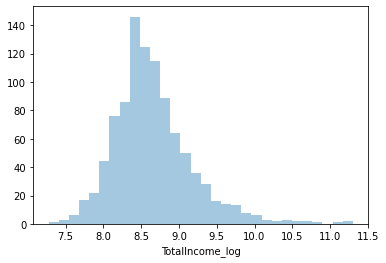

In [221]:
#Create a new column for TotalIncome and take log of it to nullify the effect of outliers

fulldata['TotalIncome'] = fulldata['ApplicantIncome'] + fulldata['CoapplicantIncome']
fulldata['TotalIncome_log'] = np.log(fulldata['TotalIncome'])

#Histogram of TotalIncome
sns.distplot(fulldata.TotalIncome_log , bins =30, kde =False)

In [227]:
#Identifying the categorical columns
cat_cols = [ 'Gender', 'Married', 'Dependents', 'Education','Self_Employed','Credit_History', 'Property_Area']

# Create label encoders for categorical features
for var in cat_cols:
    number = LabelEncoder()
    fulldata[var] = number.fit_transform(fulldata[var].astype('str'))
    
train_modified = fulldata[fulldata['Type'] == 'Train']
test_modified = fulldata[fulldata['Type'] == 'Test']
train_modified['Loan_Status'] = number.fit_transform(train_modified['Loan_Status'].astype('str'))


<ipython-input-227-4ff653eb15de>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_modified['Loan_Status'] = number.fit_transform(train_modified['Loan_Status'].astype('str'))


In [232]:
train_modified.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'Dependents',
       'Education', 'Gender', 'LoanAmount', 'LoanAmount_log',
       'Loan_Amount_Term', 'Loan_ID', 'Loan_Status', 'Married',
       'Property_Area', 'Self_Employed', 'TotalIncome', 'Type',
       'TotalIncome_log'],
      dtype='object')

LOGISTIC REGRESSION MODEL

In [137]:
#Observations till now:
#The chances of getting a loan will be higher for:
#Applicants having a credit history
#Applicants with higher education
#Applicants with higher applicant and co-applicant incomes
#Applicants in urban areas

In [238]:
# Making our model with Credit_History, Education, Gender
#from sklearn.linear_model import LogisticRegression

x_train = train_modified[['Credit_History','Education','LoanAmount_log','Property_Area','Self_Employed','TotalIncome']]
y_train = train_modified['Loan_Status']



In [239]:
x_train

,Credit_History,Education,LoanAmount_log,Property_Area,Self_Employed,TotalIncome
0,1,0,4.857444,2,0,5849.0
1,1,0,4.852030,0,0,6091.0
2,1,0,4.189655,2,1,3000.0
3,1,1,4.787492,2,0,4941.0
4,1,0,4.948760,2,0,6000.0
...,...,...,...,...,...,...
609,1,0,4.262680,0,0,2900.0
610,1,0,3.688879,0,0,4106.0
611,1,0,5.533389,2,0,8312.0
612,1,0,5.231109,2,0,7583.0


In [240]:
y_train

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [241]:
x_test = test_modified[['Credit_History','Education','LoanAmount_log','Property_Area','Self_Employed','TotalIncome']]

In [242]:
x_test

,Credit_History,Education,LoanAmount_log,Property_Area,Self_Employed,TotalIncome
0,1,2,4.857444,5,2,5720.0
1,1,2,4.857444,5,2,4576.0
2,1,2,4.857444,5,2,6800.0
3,1,2,4.857444,5,2,4886.0
4,1,3,4.857444,5,2,3276.0
...,...,...,...,...,...,...
362,1,3,4.857444,5,3,5786.0
363,1,2,4.857444,5,2,4867.0
364,1,2,4.857444,4,2,5243.0
365,1,2,4.857444,3,2,7393.0


In [243]:
#Creating and training the model
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\priya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [247]:
#Predict the output
predictions = model.predict(x_test)

#Reverse encoding the predicted outcome
rev_predictions = number.inverse_transform(predictions)

In [248]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [249]:
rev_predictions

array(['1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '0.0', '1.0',
       '1.0', '1.0', '1.0', '1.0', '0.0', '1.0', '1.0', '1.0', '1.0',
       '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '0.0', '1.0',
       '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '0.0',
       '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0',
       '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0',
       '1.0', '0.0', '1.0', '1.0', '0.0', '1.0', '1.0', '1.0', '1.0',
       '0.0', '1.0', '1.0', '0.0', '0.0', '1.0', '0.0', '1.0', '1.0',
       '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '0.0',
       '1.0', '0.0', '1.0', '0.0', '1.0', '1.0', '1.0', '1.0', '1.0',
       '1.0', '1.0', '1.0', '1.0', '0.0', '1.0', '1.0', '1.0', '1.0',
       '1.0', '1.0', '0.0', '1.0', '1.0', '1.0', '1.0', '0.0', '1.0',
       '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0',
       '0.0', '0.0', '0.0', '1.0', '1.0', '1.0', '0.0', '0.0', '1.0',
       '0.0', '1.0',

In [257]:
#store it into the dataset
test_modified['Loan_Status'] = rev_predictions

outcome_var = 'Loan_Status'

<ipython-input-257-d4d16b9c1510>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_modified['Loan_Status'] = rev_predictions


In [254]:
test_modified

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,LoanAmount_log,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,TotalIncome,Type,TotalIncome_log
0,5720,0.0,1,0,2,3,110.0,4.857444,360.0,LP001015,1.0,3,5,2,5720.0,Test,8.651724
1,3076,1500.0,1,1,2,3,126.0,4.857444,360.0,LP001022,1.0,3,5,2,4576.0,Test,8.428581
2,5000,1800.0,1,2,2,3,208.0,4.857444,360.0,LP001031,1.0,3,5,2,6800.0,Test,8.824678
3,2340,2546.0,1,2,2,3,100.0,4.857444,360.0,LP001035,1.0,3,5,2,4886.0,Test,8.494129
4,3276,0.0,1,0,3,3,78.0,4.857444,360.0,LP001051,1.0,2,5,2,3276.0,Test,8.094378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777.0,1,4,3,3,113.0,4.857444,360.0,LP002971,1.0,3,5,3,5786.0,Test,8.663196
363,4158,709.0,1,0,2,3,115.0,4.857444,360.0,LP002975,1.0,3,5,2,4867.0,Test,8.490233
364,3250,1993.0,1,0,2,3,126.0,4.857444,360.0,LP002980,1.0,2,4,2,5243.0,Test,8.564649
365,5000,2393.0,1,0,2,3,158.0,4.857444,360.0,LP002986,1.0,3,3,2,7393.0,Test,8.908289


In [256]:
test_modified.to_csv('Logistic_Regression.csv', columns = ['Loan_ID','Loan_Status'])

GENERIC CLASSIFICATION FUNCTION

In [268]:
#Generic function for making a classification model and accessing performance
from sklearn import metrics

def classification_model(model, data, predictors, outcome):
    
    #Fit the model:
    model.fit(data[predictors], data[outcome])
    
    #Make predictions on training set
    predictions = model.predict(data[predictors])
    
    #Print accuracy
    Accuracy = metrics.accuracy_score(predictions, data[outcome])
    print('Accuracy : %s' % '{0 : 0.3 %}'.format(Accuracy))

In [269]:
predictors_Logistic = ['Credit_History','Education','LoanAmount_log','Property_Area','Self_Employed','TotalIncome']
classification_model(model, train, predictors_Logistic, outcome_var)

Accuracy : 80.945%


C:\Users\priya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
